In [1]:
import os
import detectron2

from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog


/userhome/34/h3567721/anaconda3/envs/pytorch-v/lib/python3.6/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
def format_file_list(data_root, split):
    with open(data_root + '/%s.txt' % split, 'r') as f:
        frames = f.readlines()

    subfolders = [x.split(' ')[0] for x in frames]
    frame_ids = [x.split(' ')[1][:-1] for x in frames]

    image_file_list = [os.path.join(data_root, subfolders[i],
                                    frame_ids[i] + '.jpg') for i in range(len(frames))]
    return image_file_list

In [3]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("Cityscapes/mask_rcnn_R_50_FPN.yaml"))

In [4]:
print(cfg.MODEL.WEIGHTS)

detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl


In [5]:
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("Cityscapes/mask_rcnn_R_50_FPN.yaml")
predictor = DefaultPredictor(cfg)

In [6]:
print(cfg.MODEL.WEIGHTS)

https://dl.fbaipublicfiles.com/detectron2/Cityscapes/mask_rcnn_R_50_FPN/142423278/model_final_af9cf5.pkl


In [7]:
base_path = "/userhome/34/h3567721/dataset/kitti"
kitti_raw_eigen_data_dir = os.path.join(base_path, "kitti_raw_eigen")
image_file_list = format_file_list(kitti_raw_eigen_data_dir, split="train")

In [8]:
print(len(image_file_list))

40238


In [9]:
def seg_sig_img(img_path):
    print(img_path)    
    im = cv2.imread(img_path)
    cv2_imshow(im)
    outputs = predictor(im)
    print(outputs["instances"].pred_classes)
    print(outputs["instances"].pred_boxes)
    v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])
    
    return im, outputs

/userhome/34/h3567721/dataset/kitti/kitti_raw_eigen/2011_10_03_drive_0034_sync_03/0000001058.jpg


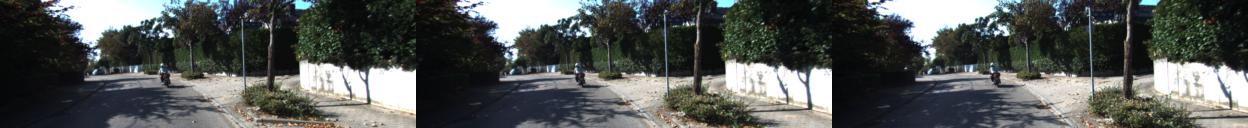

tensor([6, 1, 1], device='cuda:0')
Boxes(tensor([[ 990.6962,   71.8549, 1000.6226,   84.4104],
        [ 989.6148,   62.5767, 1000.1579,   80.9814],
        [ 159.9516,   61.9291,  170.9810,   81.4472]], device='cuda:0'))


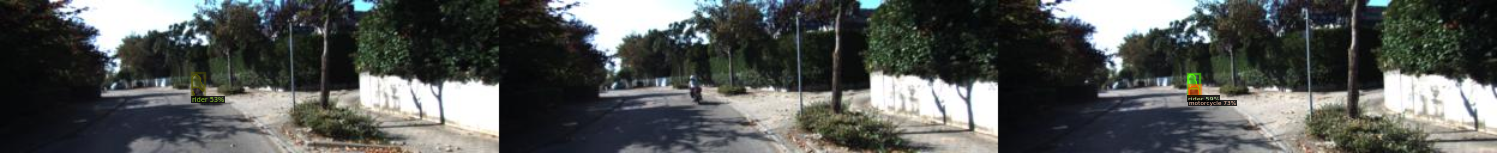

In [27]:
img, seg_img = seg_sig_img(image_file_list[6666])

/userhome/34/h3567721/dataset/kitti/kitti_raw_eigen/2011_09_30_drive_0034_sync_03/0000000737.jpg


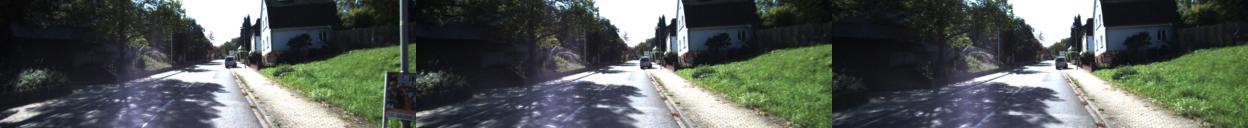

tensor([2, 2, 2, 4], device='cuda:0')
Boxes(tensor([[1054.9779,   56.9486, 1068.1953,   69.6275],
        [ 224.6956,   56.2943,  237.1029,   68.5196],
        [ 639.9991,   57.1461,  652.4011,   69.5096],
        [ 261.1515,    2.5131,  336.1400,   68.9241]], device='cuda:0'))


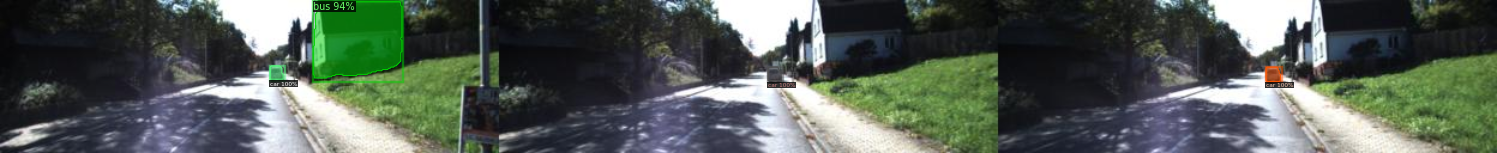

In [50]:
img, seg_img = seg_sig_img(image_file_list[765])

/userhome/34/h3567721/dataset/kitti/kitti_raw_eigen/2011_09_30_drive_0034_sync_03/0000000440.jpg


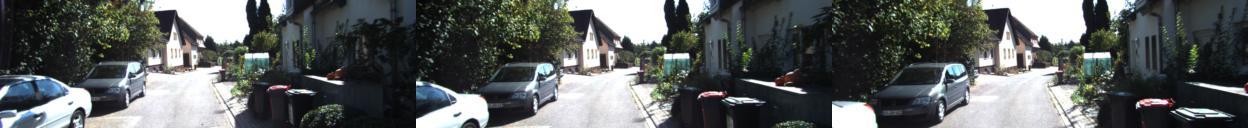

tensor([2, 2, 2, 2], device='cuda:0')
Boxes(tensor([[477.6618,  61.9685, 558.6589, 120.2988],
        [ 77.2897,  60.8583, 146.0444, 111.6949],
        [868.4471,  61.3161, 970.7156, 125.5930],
        [  2.9258,  74.1571,  90.9326, 128.0000]], device='cuda:0'))


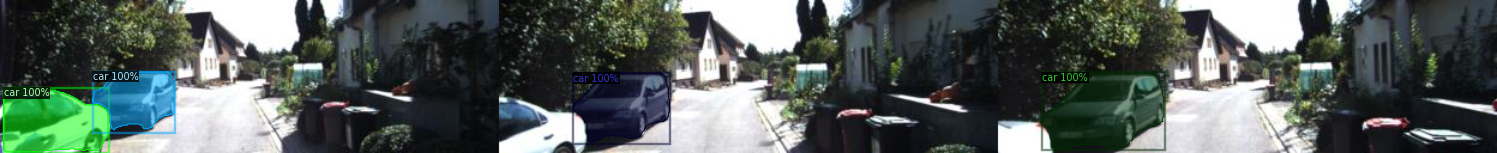

In [52]:
img, seg_img = seg_sig_img(image_file_list[78])

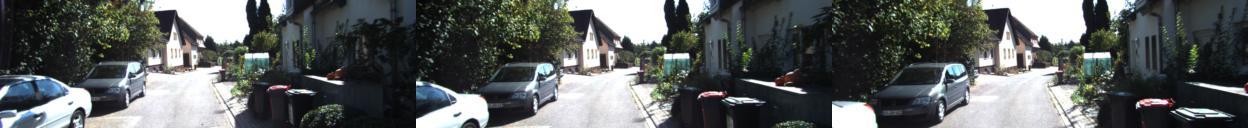

In [53]:
cv2_imshow(img)

In [54]:
seg_img["instances"].scores

tensor([1.0000, 0.9999, 0.9999, 0.9993], device='cuda:0')

In [55]:
seg_img["instances"].pred_classes

tensor([2, 2, 2, 2], device='cuda:0')

In [56]:
seg_img["instances"].pred_masks[0].shape

torch.Size([128, 1248])

In [57]:
len(seg_img["instances"].pred_masks)

4

In [58]:
seg_img["instances"].pred_masks[0]

tensor([[False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        ...,
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False],
        [False, False, False,  ..., False, False, False]], device='cuda:0')

In [59]:
MetadataCatalog.get(cfg.DATASETS.TRAIN[0])

Metadata(evaluator_type='cityscapes_instance', gt_dir='datasets/cityscapes/gtFine/train', image_dir='datasets/cityscapes/leftImg8bit/train', name='cityscapes_fine_instance_seg_train', stuff_classes=['road', 'sidewalk', 'building', 'wall', 'fence', 'pole', 'traffic light', 'traffic sign', 'vegetation', 'terrain', 'sky', 'person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle', 'bicycle', 'license plate'], thing_classes=['person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle', 'bicycle'])

In [60]:
thing_classes=['person', 'rider', 'car', 'truck', 'bus', 'train', 'motorcycle', 'bicycle']

In [61]:
import numpy as np
import matplotlib.pyplot as plt

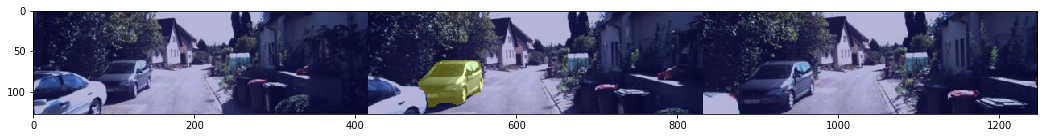

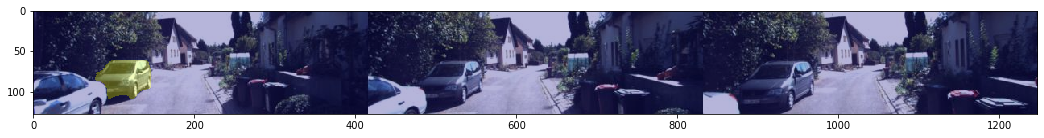

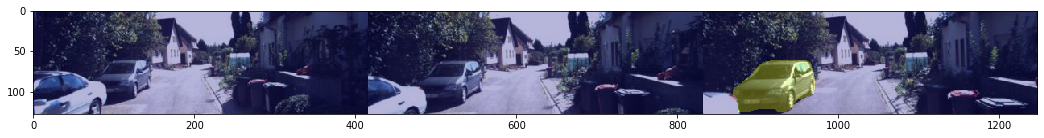

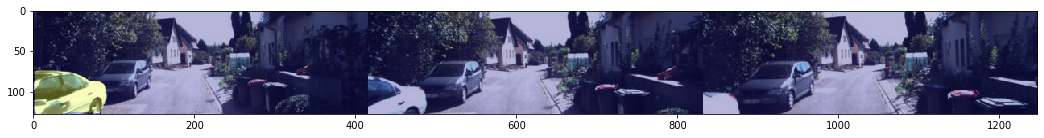

In [62]:
for i in range(len(seg_img["instances"].pred_masks)):
    plt.figure(figsize=(18,6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.imshow(seg_img["instances"].pred_masks[i].cpu(), 'plasma', alpha=0.3)
    plt.show()

In [66]:
import torch

In [134]:
def mask_sig_img(img_path):
    im = cv2.imread(img_path)
    seg_img = predictor(im)

    mask_img = np.zeros((128, 1248, 1), dtype = "uint8")

    print(img_path)
    for i in range(len(seg_img["instances"].pred_masks)):
        print("class: ", thing_classes[seg_img["instances"].pred_classes[i].cpu()], 
              "score: ", seg_img["instances"].scores[i].cpu().numpy())
        mask = (seg_img["instances"].pred_masks[i].cpu() > 0).type(torch.uint8)  
        mask_img += torch.unsqueeze(mask, 2).numpy()*255
    
    return im, mask_img

In [135]:
img_, mask_img = mask_sig_img(image_file_list[78])

/userhome/34/h3567721/dataset/kitti/kitti_raw_eigen/2011_09_30_drive_0034_sync_03/0000000440.jpg
class:  car score:  0.9999535
class:  car score:  0.99993336
class:  car score:  0.9999006
class:  car score:  0.99930525


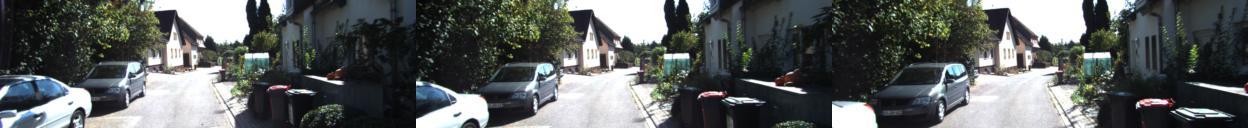

In [136]:
cv2_imshow(img_)

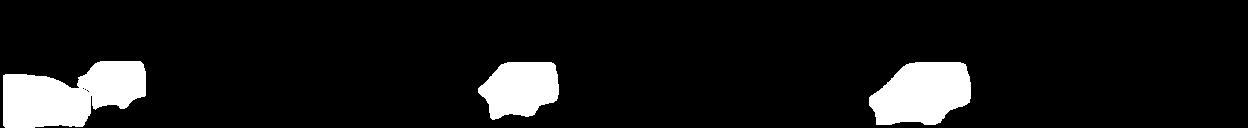

In [137]:
cv2_imshow(mask_img)